<a href="https://colab.research.google.com/github/tisjayy/mlstocks/blob/main/LSTM_BollingerB_RSI__backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Backtesting Stock returns using strategy

---



- This notebook runs backtesting on the combinatin of LSTM model, bollinger  bands and RSI. It executes trades when atleast 2 of the 3 indicators alighn. It is designed to run only on **Google Colab** for faster training.To run it locally data path may need to modify<br>
- It will take approximately 2.5 hours to run the default data of 50 assets for 5 years


**In the next step you can load the lstm model already trained by me, available on my github or modify it according to your choices and then load it here.**

The data_path refers to the data folder in my github with 50 stocks as csv. You can upload the latest data as well but then please modify those csv accordingly by changing colummn names and removing unncessary features.
Note that my current folder has data upto 2023.

In [ ]:
lstm_model_path = '/content/lstm_12_p50_ckp_13_24_e150.h5'
data_path = '/content/Data/sp50'

Your dataset folder should have the last child folder as 'daily'. But you shoudn't add the 'daily' folder name in 'data_path' <br>
For ex: dataset path is '/content/drive/MyDrive/Colab Notebooks/Data/sp50/daily'<br>
extract it as: '/content/drive/MyDrive/Colab Notebooks/Data/sp50'

### Now you are ready to go, just click 'run all'

# Zipline installation

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3999    0  3999    0     0  10472      0 --:--:-- --:--:-- --:--:-- 10496
100  517k  100  517k    0     0   511k      0  0:00:01  0:00:01 --:--:-- 4076k
--2025-07-25 18:53:37--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [ ]:
!pip install tensorflow==2.15.0 keras==2.15.0 pandas==2.1.3 numpy==1.26.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing insta

In [ ]:
!pip install pandas==2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 111.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
# @title Default title text
%%capture
%pip install zipline-reloaded

In [ ]:
# @title Quantstats Installation
%%capture
!pip install quantstats

In [ ]:
# @title Import Libraries
import numpy as np
import pandas as pd
import os
%load_ext zipline
from zipline.api import symbol, order,record, order_target, get_open_orders,order_target_percent, order_percent,order_target_value
from zipline.utils.calendar_utils import get_calendar
from zipline import run_algorithm
from zipline.data import bundles
from zipline.utils.run_algo import load_extensions  # Zipline extensions are needed for listing sids
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)
%matplotlib inline
import matplotlib.pyplot as plt
import quantstats as qs
import talib
import yfinance as yf

import os
import sys
from datetime import datetime
from os.path import abspath
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

from sklearn.preprocessing import MinMaxScaler
from zipline.api import symbol, get_open_orders


# from hurst import compute_Hc


# Zipline imports
from zipline.utils.run_algo import load_extensions
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendar_utils import get_calendar

from zipline.api import set_max_leverage, schedule_function, set_benchmark,set_commission
from zipline.finance.commission import PerContract, PerDollar, PerShare, PerTrade
from zipline.finance.commission import CommissionModel
from zipline.finance.slippage import VolumeShareSlippage, FixedSlippage
from zipline.finance.commission import PerShare, PerTrade, PerDollar
from zipline.api import set_slippage, set_commission
from zipline.data.bundles import register, unregister, ingest
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.utils.calendar_utils import register_calendar, get_calendar
from zipline.api import (order,
                         order_target,
                         order_value,
                         record,
                         symbol,
                         get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm
from zipline.utils.calendar_utils import get_calendar
from zipline.api import order_target, record, date_rules, time_rules, symbol # type: ignore

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore', category=Warning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)
%matplotlib inline
%load_ext autoreload
%autoreload 2

from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# ROOT_DIR = abspath('../')
# sys.path.append(ROOT_DIR)

Ingest data

In [ ]:
from zipline.data import bundles

bundle_name = 'sp50'

bundles.register(
    bundle_name,
    bundles.csvdir.csvdir_equities(
        ['daily'],
        data_path  # change the path for your data or upload it
    ),
    calendar_name='NYSE',
)

bundles.bundles

mappingproxy({'quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quandl_bundle at 0x7c1a7b3dd3a0>, create_writers=True),
              'quantopian-quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quantopian_quandl_bundle at 0x7c1a7b3dd260>, create_writers=False),
              'csvdir': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function csvdir_bundle at 0x7c1a78306480>, create_writers=True),
              'sp50': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7c1aca558d10>>, create_writers=True)})

In [ ]:
bundles.ingest(bundle_name)

In [ ]:
bundle = 'sp50'
calendar_name = 'NYSE'
calendar = get_calendar(calendar_name)
bundle_data = bundles.load(bundle)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)
sp50tickers = [coin.symbol for coin in assets]

### Funtions for Stategy Calculations

In [ ]:
# @title Module for generating signals

def calculate_bollinger_bands(prices, dev, window=20):
    """
    Calculate Bollinger Bands for a given series of prices.

    Parameters:
    - prices (pd.Series or np.array): Series of prices.
    - dev (float): Number of standard deviations to use for the bands.
    - window (int, optional): Rolling window size for calculating moving averages. Default is 20.

    Returns:
    - upper_band (float): Upper Bollinger Band.
    - sma (float): Simple Moving Average.
    - lower_band (float): Lower Bollinger Band.
    """

    sma = prices.mean()
    rolling_std = prices.std()
    upper_band = sma + (dev * rolling_std)
    lower_band = sma - (dev * rolling_std)
    return upper_band, sma, lower_band


def calculate_rsi(prices, window):
    """
    Calculate Relative Strength Index (RSI) for a given series of prices.

    Parameters:
    - prices (pd.Series or np.array): Series of prices.
    - window (int): Window size for calculating RSI.

    Returns:
    - rsi (pd.Series or np.array): Relative Strength Index values.
    """

    deltas = [prices[i + 1] - prices[i] for i in range(len(prices) - 1)]
    gains = [delta if delta > 0 else 0 for delta in deltas]
    losses = [-delta if delta < 0 else 0 for delta in deltas]

    avg_gain = sum(gains[:window]) / window
    avg_loss = sum(losses[:window]) / window

    rs = avg_gain / avg_loss if avg_loss != 0 else float("inf")
    rsi = 100 - (100 / (1 + rs))

    for i in range(window, len(prices) - 1):
        delta = prices[i + 1] - prices[i]
        gain = delta if delta > 0 else 0
        loss = -delta if delta < 0 else 0

        avg_gain = ((avg_gain * (window - 1)) + gain) / window
        avg_loss = ((avg_loss * (window - 1)) + loss) / window

        rs = avg_gain / avg_loss if avg_loss != 0 else float("inf")
        rsi.append(100 - (100 / (1 + rs)))

    return rsi


def calculate_atr(high_prices, low_prices, close_prices, period=14):
    """
    Calculate Average True Range (ATR) for a given series of high, low, and close prices.

    Parameters:
    - high_prices (pd.Series or np.array): Series of high prices.
    - low_prices (pd.Series or np.array): Series of low prices.
    - close_prices (pd.Series or np.array): Series of close prices.
    - period (int, optional): Period for calculating ATR. Default is 14.

    Returns:
    - atr (float): Average True Range.
    """

    high_low_diff = high_prices - low_prices
    high_close_diff = np.abs(high_prices - np.roll(close_prices, 1))
    low_close_diff = np.abs(low_prices - np.roll(close_prices, 1))
    true_range = np.maximum(high_low_diff, high_close_diff, low_close_diff)
    atr = np.mean(true_range[:period])
    for i in range(period, len(true_range)):
        atr = ((period - 1) * atr + true_range[i]) / period
    return atr


import yfinance as yf
import quantstats as qs
import pandas as pd

def plots(results):
    """
    Generate plots comparing strategy returns with a benchmark.

    Parameters:
    - results (pd.DataFrame): DataFrame containing a 'returns' column.

    Returns:
    - None
    """

    # Ensure index is datetime
    results.index = pd.to_datetime(results.index)

    # Remove duplicated and null timestamps
    results = results.loc[~results.index.duplicated(keep='first')]
    results = results[results.index.notnull()]

    # Convert timezone only if it's already tz-aware
    if results.index.tz is not None:
        results.index = results.index.tz_convert(None)

    # Download benchmark data
    start = results.index[0]
    end = results.index[-1]
    benchmark = yf.download("^GSPC", start=start, end=end)["Close"].pct_change()
    benchmark = benchmark[benchmark.index.notnull()]

    # Align the two DataFrames on overlapping dates
    common_index = results.index.intersection(benchmark.index)
    results = results.loc[common_index]
    benchmark = benchmark.loc[common_index]

    # Run quantstats report
    qs.reports.full(
        results["returns"],
        benchmark=benchmark,
        match_dates=True,
        figsize=(8, 4),
        df=results
        # output='/content/asset50rsi_bg_without_lstm.html'
    )



def group1_ensemble_model_signals(context, data):
    """
    Generates trading signals based on Bollinger Bands, RSI, and LSTM prediction.
    Uses 2-out-of-3 condition confirmation to buy/sell.

    Parameters:
    - context: Context object containing necessary parameters.
    - data: Data object containing price data.

    Returns:
    - today_signal (dict): Signal for the last day for each ticker. It can take values [-1, 0, 1].
    """
    today_signal = {}

    for ticker in context.tickers:
        # Get price history for LSTM input
        price_tomorrow = data.history(
            symbol(ticker), "price", bar_count=50, frequency="1d"
        )

        scaler = MinMaxScaler(feature_range=(0, 1))
        price_tomorrow = scaler.fit_transform(np.array(price_tomorrow).reshape(-1, 1))
        price_tomorrow = price_tomorrow.reshape(price_tomorrow.shape[1], price_tomorrow.shape[0], 1)

        predicted_price_tomorrow = scaler.inverse_transform(
            context.lstm_model.predict(price_tomorrow)
        )[0][0]

        # Get price history for indicators
        prices = data.history(symbol(ticker), "price", context.window + 1, "1d")
        current_price = data.current(symbol(ticker), "price")
        open_orders = get_open_orders(ticker)

        # Calculate indicators
        upper_band, mid_band, lower_band = calculate_bollinger_bands(
            prices, context.bollinger_dev, window=context.window
        )
        rsi_value = calculate_rsi(prices, window=context.window)

        # Buy/Sell conditions
        bollinger_buy = current_price < lower_band
        rsi_buy = rsi_value < 30
        lstm_buy = predicted_price_tomorrow > current_price

        bollinger_sell = current_price > upper_band
        rsi_sell = rsi_value > 70
        lstm_sell = predicted_price_tomorrow < current_price

        # Vote counts
        buy_votes = sum([bollinger_buy, rsi_buy, lstm_buy])
        sell_votes = sum([bollinger_sell, rsi_sell, lstm_sell])

        signal = 0  # Default: hold

        # Decision logic
        if buy_votes >= 2 and ticker not in context.buy_stocks and ticker not in open_orders:
            signal = 1
        elif sell_votes >= 2 and ticker in context.buy_stocks and ticker not in open_orders:
            signal = -1

        today_signal[ticker] = signal

    return today_signal

In [ ]:
START_DATE = pd.Timestamp('2018-01-01')
END_DATE = pd.Timestamp('2022-12-31') # Backtesting for 1 year

BASE_CAPITAL = 100_000

## Backtesting

*It* will take approximately 2.5 hours to run the default data of 50 assets for 5 years time period

In [ ]:
#%%capture

import time
start_time = time.time()

def initialize(context):
    context.idx = 0
    context.tickers = sp50tickers
    context.window = 20
    context.bollinger_dev = 1.5
    context.stop_loss = 0.05
    context.take_profit = 0.05
    context.stops, context.profits = 0, 0
    context.buy_stocks = set()
    context.cash_pct = 0.25
    context.atr_window = 14
    context.atr_dev = 1.5
    context.buy_count, context.sell_count = 0, 0
    context.current_date = None
    # upload the LSTM model file from https://github.com/YeakubSadlil/Ensemble_backtesting_stock_market/blob/main/lstm_12_p50_ckp_13_24_e150.h5
    context.lstm_model = load_model(lstm_model_path)
    context.model_window = 52

# Define the handle_data function
def handle_data(context, data):
    context.idx += 1
    if context.idx < context.model_window:
        return

    # Generate signals using groupx_ensemble_model_signals function which is the generate_signal.pymodule
    signal = group1_ensemble_model_signals(context, data)


    # Execute trades based on the generated signals
    for ticker, signal_value in signal.items():
        open_orders = get_open_orders(ticker)

        if ticker not in open_orders:
            if signal_value == 1 and ticker not in context.buy_stocks:
                if context.portfolio.cash > 0:
                    # print(signal)
                    order_value(symbol(ticker), context.portfolio.cash * context.cash_pct)  # Buy Signal
                    context.buy_stocks.add(ticker)

            elif signal_value == -1 and ticker in context.buy_stocks:
                order_target_percent(symbol(ticker), 0)  # Sell Signal
                context.buy_stocks.remove(ticker)


# Run the algorithm
results = run_algorithm(
    start=START_DATE,
    end=END_DATE,
    initialize=initialize,
    handle_data=handle_data,
    capital_base=BASE_CAPITAL,
    benchmark_returns=None,
    data_frequency='daily',
    bundle='sp50',
)


end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time for 50 assets: {inference_time:.6f} seconds")



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 36ms/step
Inference time for 50 assets: 6336.740571 seconds


Plot the performance of the ensemble strategy

In [ ]:
plots(results)

[*********************100%***********************]  1 of 1 completed


[Performance Metrics]



ValueError: Invalid frequency: ME

[*********************100%***********************]  1 of 1 completed


Strategy Total Return: 54.57%
S&P 500 Total Return: 42.79%


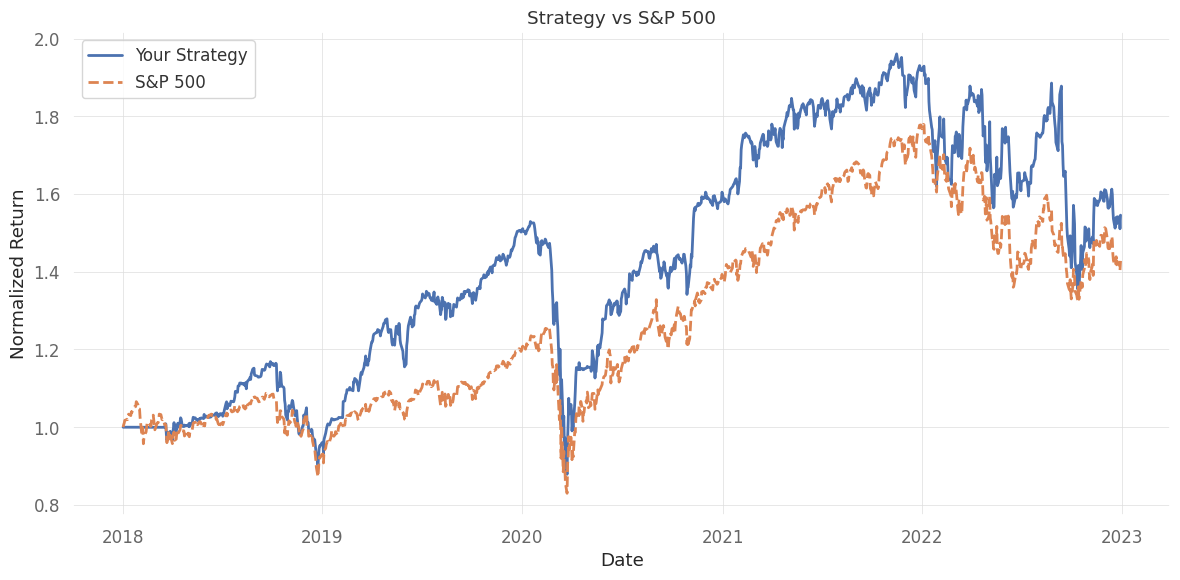

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Assuming 'results' has a column 'portfolio_value' or 'strategy_returns'
# Example: If you only have daily returns
# results['cumulative_returns'] = (1 + results['strategy_returns']).cumprod()

# If you already have portfolio value
results = results.copy()
results['normalized_strategy'] = results['portfolio_value'] / results['portfolio_value'].iloc[0]

# Download S&P 500
sp500 = yf.download('^GSPC', start=results.index.min(), end=results.index.max())
sp500['normalized_sp500'] = sp500['Close'] / sp500['Close'].iloc[0]

# Align both datasets by date
combined = pd.DataFrame({
    'Strategy': results['normalized_strategy'],
    'S&P 500': sp500['normalized_sp500']
}).dropna()
# Compute total returns
strategy_return = (combined['Strategy'].iloc[-1] - 1) * 100
sp500_return = (combined['S&P 500'].iloc[-1] - 1) * 100

print(f"Strategy Total Return: {strategy_return:.2f}%")
print(f"S&P 500 Total Return: {sp500_return:.2f}%")
# Plot
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['Strategy'], label='Your Strategy', linewidth=2)
plt.plot(combined.index, combined['S&P 500'], label='S&P 500', linewidth=2, linestyle='--')
plt.title('Strategy vs S&P 500')
plt.ylabel('Normalized Return')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Saved the results because if the function to plot doesnt work on the first try and if you have to modify the function or load some libraries then you dont lose the results when you restart the session

In [ ]:
import pickle

# Save the object
with open("results.pkl", "wb") as f:
    pickle.dump(results, f)


In [ ]:
results.to_csv("backtest_results.csv")


In [ ]:
import pickle

# Load it back
with open("results.pkl", "rb") as f:
    results = pickle.load(f)


[*********************100%***********************]  1 of 1 completed


[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-03-19   2018-03-19
End Period                 2022-12-29   2022-12-29
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          39.87%       54.57%
CAGR﹪                     4.96%        6.49%

Sharpe                     0.43         0.48
Prob. Sharpe Ratio         82.42%       85.45%
Smart Sharpe               0.39         0.44
Sortino                    0.59         0.69
Smart Sortino              0.54         0.63
Sortino/√2                 0.42         0.49
Smart Sortino/√2           0.38         0.44
Omega                      1.1          1.1

Max Drawdown               -33.92%      -42.53%
Max DD Date                2020-03-23   2020-03-23
Max DD Period Start        2020-02-20   2020-01-17
Max DD Period End          2020-08-17   2020-11-06
Longest DD Days            360          409
Volat

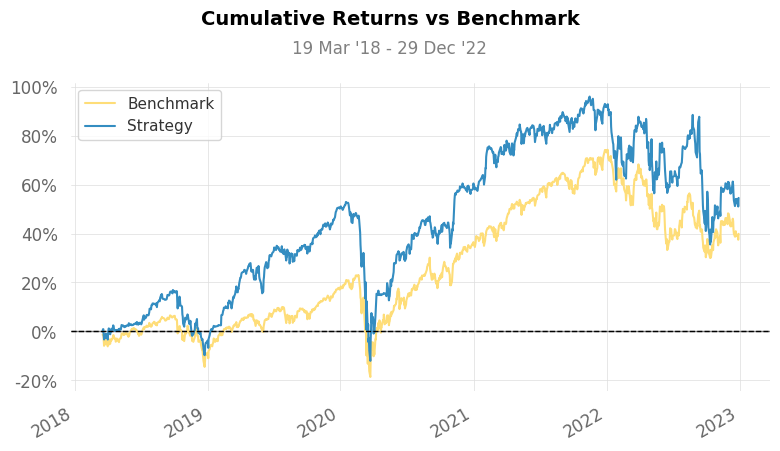

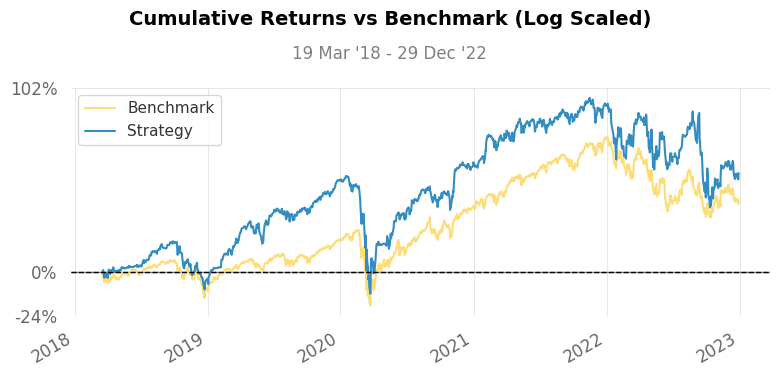

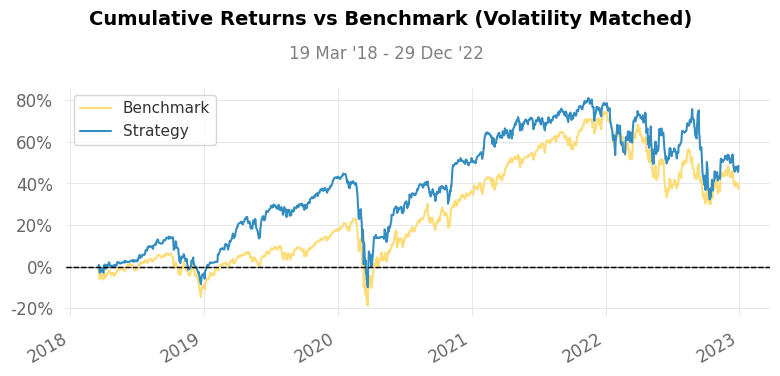

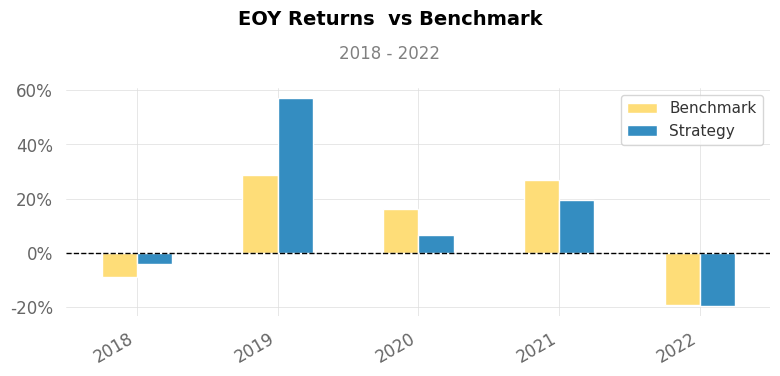

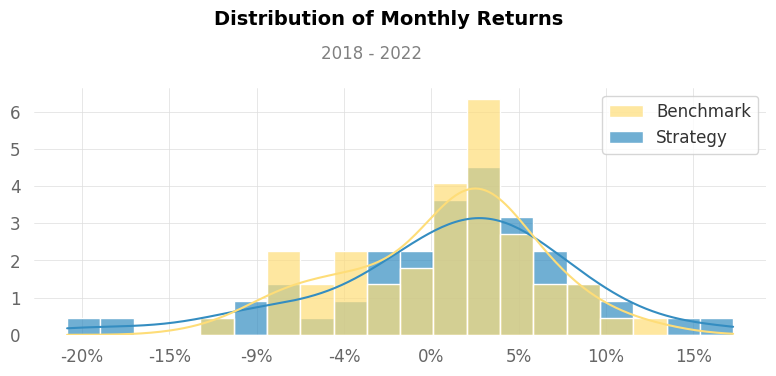

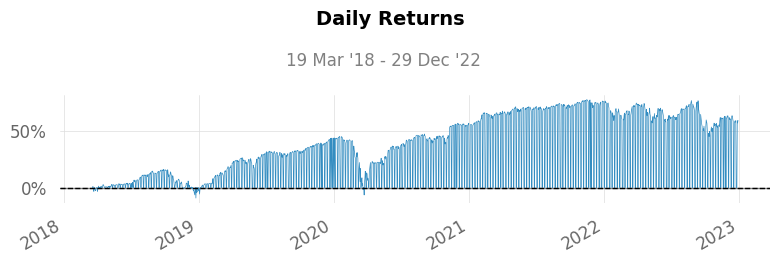

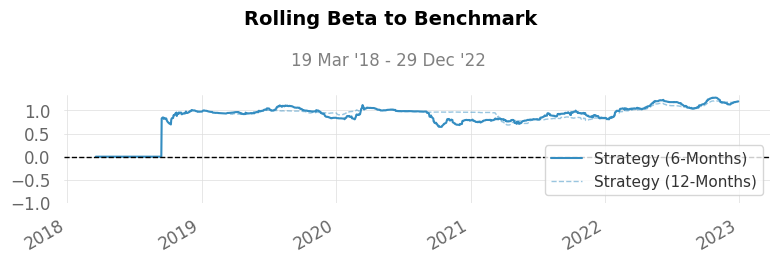

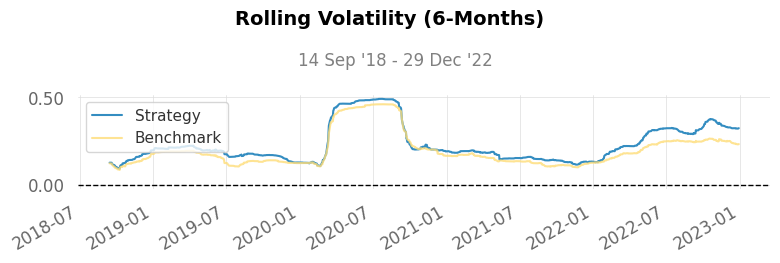

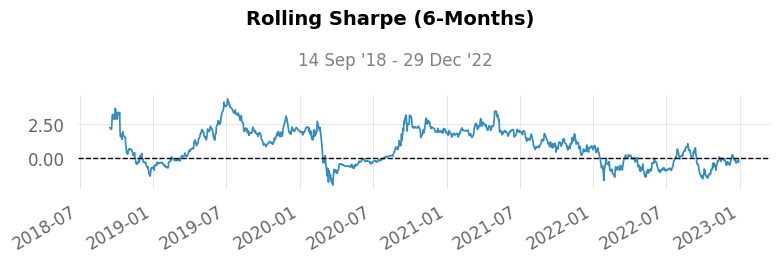

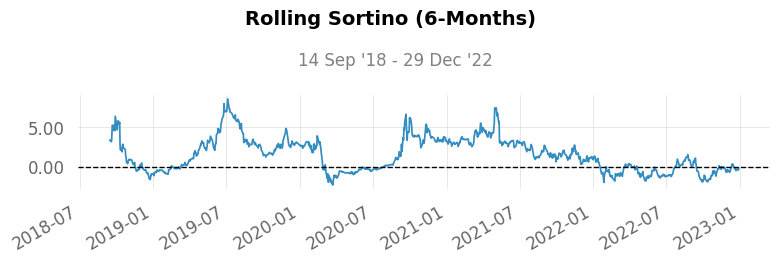

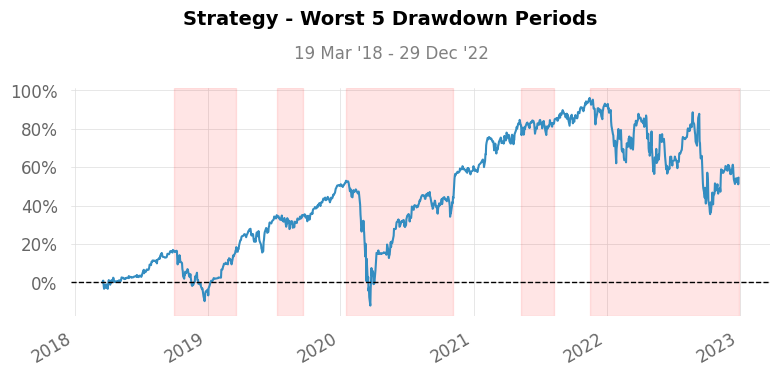

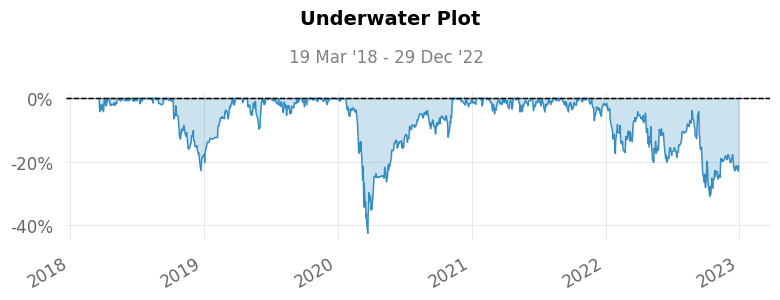

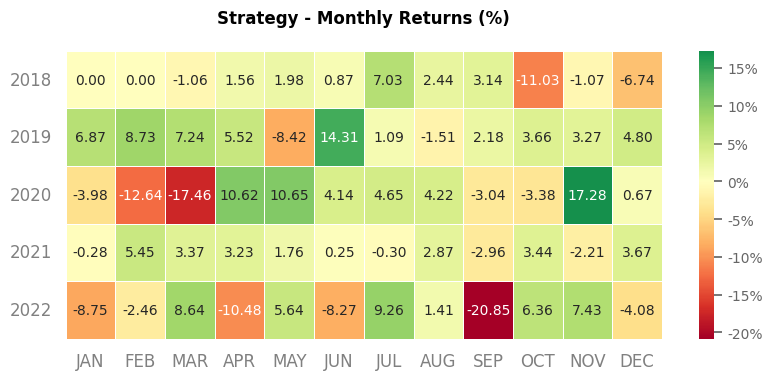

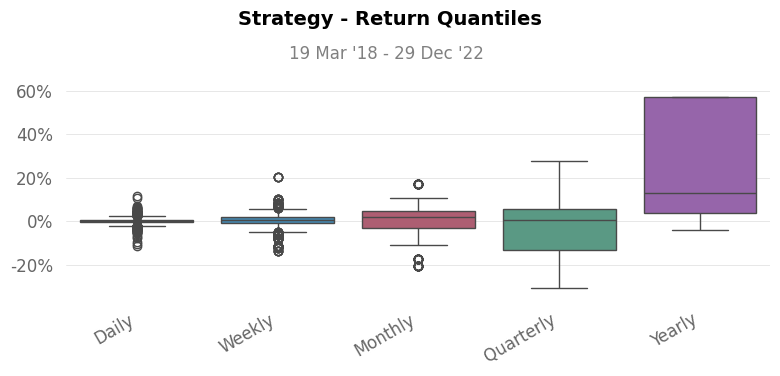

In [ ]:
plots(results)